### HEALTH EQUITY INDICATORS; SAN FRANCISCO, CA 2020 ###

In this notebook, I will combine the data I have collected and analyzed thus far on COVID-19 burden and access to health insurance in San Francisco. I am going to add information on hospital locations in the city and look at the proximity of hospitals to the neighborhoods that are most affected by COVID-19. 

#### IMPORTING DATA ####

In [2]:
#importing libraries
import pandas as pd
import geopandas as gpd
import plotly.express as px

First, I am going to pull in data that will connect the census tracts with actual recognized neighborhoods in San Francisco.

In [7]:
#pull in the Analysis Neighborhoods data set from DataSF
nb = gpd.read_file('data/SF2020_Neighborhoods_CTs.geojson')

In [8]:
nb.shape

(242, 12)

It looks like there are 242 census tracts which aligns with the data sets I have been working with.

In [9]:
nb.head(5)

,name,neighborhoods_analysis_boundaries,tractce,sup_dist_2022,data_loaded_at,county_fp,state_fp,sup_dist_2012,data_as_of,object_id,geoid,geometry
0,9809,Bayview Hunters Point,980900,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,242,06075980900,"MULTIPOLYGON (((-122.37276 37.74551, -122.3727..."
1,9806,Bayview Hunters Point,980600,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,241,06075980600,"MULTIPOLYGON (((-122.36519 37.73373, -122.3665..."
2,9805.01,McLaren Park,980501,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,240,06075980501,"MULTIPOLYGON (((-122.40667 37.71921, -122.4069..."
3,9804.01,The Farallones,980401,4,2022-07-08 14:12:00,075,06,1,2022-07-08 21:09:48.141,239,06075980401,"MULTIPOLYGON (((-123.00360 37.69325, -123.0040..."
4,612,Bayview Hunters Point,061200,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,226,06075061200,"MULTIPOLYGON (((-122.38528 37.74024, -122.3858..."


I will now clean up this data a bit and drop some of the census tracts that correspond to islands with no residents.

In [10]:
#dropping the Farrollones census tract because it has messed with our maps in the past
nb = nb.drop(labels=3, axis=0)

In [11]:
nb.shape

(241, 12)

Ok, it appears the tract was dropped!

In [12]:
#renaming the six columns
nb.columns = ['Name',
              'Neighborhood', 
              'Census Tract',
              'Supervisor District 2022',
              'Data Loaded',
              'County Code',
              'State Code',
              'Supervisor District 2012',
              'Data as of',
              'Object ID',
              'FIPS',
              'Geometry',]

In [13]:
#checking that the above function worked
nb.head()

,Name,Neighborhood,Census Tract,Supervisor District 2022,Data Loaded,County Code,State Code,Supervisor District 2012,Data as of,Object ID,FIPS,Geometry
0,9809,Bayview Hunters Point,980900,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,242,06075980900,"MULTIPOLYGON (((-122.37276 37.74551, -122.3727..."
1,9806,Bayview Hunters Point,980600,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,241,06075980600,"MULTIPOLYGON (((-122.36519 37.73373, -122.3665..."
2,9805.01,McLaren Park,980501,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,240,06075980501,"MULTIPOLYGON (((-122.40667 37.71921, -122.4069..."
4,612,Bayview Hunters Point,061200,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,226,06075061200,"MULTIPOLYGON (((-122.38528 37.74024, -122.3858..."
5,611.02,Chinatown,061102,3,2022-07-08 14:12:00,075,06,3,2022-07-08 21:09:48.141,225,06075061102,"MULTIPOLYGON (((-122.40631 37.79426, -122.4068..."


In [14]:
# getting a count on how many census tracts are in each neighborhood
nb['Neighborhood'].value_counts()

Mission                           17
Sunset/Parkside                   16
Tenderloin                        12
Outer Richmond                    11
Bayview Hunters Point             11
Financial District/South Beach    10
Marina                             9
Nob Hill                           9
Pacific Heights                    9
Excelsior                          8
Castro/Upper Market                7
Western Addition                   7
West of Twin Peaks                 7
South of Market                    7
Russian Hill                       7
Noe Valley                         6
Bernal Heights                     6
Oceanview/Merced/Ingleside         6
Inner Sunset                       6
Chinatown                          6
Haight Ashbury                     5
Hayes Valley                       5
Outer Mission                      5
North Beach                        5
Potrero Hill                       5
Inner Richmond                     5
Visitacion Valley                  5
P

Great, I am excited to see how this overlays with the health indicator data!

But before that happend, I need to join this data with the spatial data from 2020 census tracts. Then, I will start to map.

In [16]:
# bring in the geojson file with census tracts
tracts=gpd.read_file('data/2020CTs.geojson')
# see what the data looks like
tracts.head()

,name,intptlon,awater,mtfcc,aland,namelsad,tractce,statefp,data_loaded_at,intptlat,funcstat,countyfp,data_as_of,geoid,geometry
0,9805.01,-122.4193463,9769.0,G5020,1471536.0,Census Tract 9805.01,980501,06,2022-03-04,+37.7162081,S,075,2021-02-01,06075980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271..."
1,171.02,-122.4504754,0.0,G5020,294894.0,Census Tract 171.02,017102,06,2022-03-04,+37.7654353,S,075,2021-02-01,06075017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516..."
2,123.02,-122.4120970,0.0,G5020,92653.0,Census Tract 123.02,012302,06,2022-03-04,+37.7870222,S,075,2021-02-01,06075012302,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133..."
3,168.01,-122.4290133,0.0,G5020,226534.0,Census Tract 168.01,016801,06,2022-03-04,+37.7713309,S,075,2021-02-01,06075016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308..."
4,119.02,-122.4098067,0.0,G5020,93053.0,Census Tract 119.02,011902,06,2022-03-04,+37.7909959,S,075,2021-02-01,06075011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117..."


In [17]:
#seeing how many rows and columns we're working with 
tracts.shape

(244, 15)

This is almost a match with the 241 tracts from the neighborhood data set. But I will pull a bit more info before merging this with the neighborhood data.

In [18]:
tracts.info(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            244 non-null    object        
 1   intptlon        244 non-null    object        
 2   awater          244 non-null    object        
 3   mtfcc           244 non-null    object        
 4   aland           244 non-null    object        
 5   namelsad        244 non-null    object        
 6   tractce         244 non-null    object        
 7   statefp         244 non-null    object        
 8   data_loaded_at  244 non-null    datetime64[ns]
 9   intptlat        244 non-null    object        
 10  funcstat        244 non-null    object        
 11  countyfp        244 non-null    object        
 12  data_as_of      244 non-null    datetime64[ns]
 13  geoid           244 non-null    object        
 14  geometry        244 non-null    geometry      
dty

Based on this list of columns, we really only need the census tract number (tractce10) and geometry columns in order to merge the two data sets. Let's move forward with doing so.

In [19]:
tracts = tracts[['tractce','geometry']]
tracts.head()

,tractce,geometry
0,980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271..."
1,017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516..."
2,012302,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133..."
3,016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308..."
4,011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117..."


We have the census tract number, but we need a full FIPS code to merge. We'll add '06' for the state of California and '075' for the county of San Francisco to the census tract number as follows.

In [20]:
# create a FIPS column before merging
tracts['FIPS'] ='06' + '075' + tracts['tractce']

In [21]:
# double check that we have a new and complete FIPS code column
tracts.head()

,tractce,geometry,FIPS
0,980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271...",06075980501
1,017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516...",06075017102
2,012302,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133...",06075012302
3,016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308...",06075016801
4,011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117...",06075011902


Great, that worked! Now the FIPS codes will match the structure of the FIPS codes from the other data set which will make it possible to merge the two files.

In [22]:
# create a new dataframe based on the join, tracts is spatial data so must come first
nhoods=tracts.merge(nb,on="FIPS")

In [23]:
nhoods.head(5)

,tractce,geometry,FIPS,Name,Neighborhood,Census Tract,Supervisor District 2022,Data Loaded,County Code,State Code,Supervisor District 2012,Data as of,Object ID,Geometry
0,980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271...",06075980501,9805.01,McLaren Park,980501,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,240,"MULTIPOLYGON (((-122.40667 37.71921, -122.4069..."
1,017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516...",06075017102,171.02,Haight Ashbury,017102,8,2022-07-08 14:12:00,075,06,5,2022-07-08 21:09:48.141,84,"MULTIPOLYGON (((-122.44912 37.76165, -122.4505..."
2,012302,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133...",06075012302,123.02,Tenderloin,012302,3,2022-07-08 14:12:00,075,06,3,2022-07-08 21:09:48.141,32,"MULTIPOLYGON (((-122.40823 37.78736, -122.4098..."
3,016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308...",06075016801,168.01,Hayes Valley,016801,5,2022-07-08 14:12:00,075,06,5,2022-07-08 21:09:48.141,79,"MULTIPOLYGON (((-122.42493 37.77078, -122.4264..."
4,011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117...",06075011902,119.02,Nob Hill,011902,3,2022-07-08 14:12:00,075,06,3,2022-07-08 21:09:48.141,24,"MULTIPOLYGON (((-122.40879 37.79016, -122.4104..."


In [24]:
# define the columns to keep, which include: geometry, FIPS and Neighborhood
columns_to_keep = ['geometry',
                   'FIPS',
                   'Neighborhood']

In [25]:
# copy and create a new function, nhoods2, that just displays the defined columns to keep
nhoods2 = nhoods[columns_to_keep].copy()
nhoods2

,geometry,FIPS,Neighborhood
0,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271...",06075980501,McLaren Park
1,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516...",06075017102,Haight Ashbury
2,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133...",06075012302,Tenderloin
3,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308...",06075016801,Hayes Valley
4,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117...",06075011902,Nob Hill
...,...,...,...
236,"MULTIPOLYGON (((-122.42646 37.76627, -122.4252...",06075020201,Mission
237,"MULTIPOLYGON (((-122.39362 37.78308, -122.3928...",06075061508,Financial District/South Beach
238,"MULTIPOLYGON (((-122.43075 37.79865, -122.4291...",06075013001,Marina
239,"MULTIPOLYGON (((-122.42484 37.80227, -122.4246...",06075010201,Russian Hill


This is exactly what we need in order to start mapping our neighborhoods of census tracts! In the next section, I will import the COVID-19 data and then the health insurance data and then map it over the neighborhoods. But first, I want to see what the neighborhoods look like mapped out!

<AxesSubplot: >

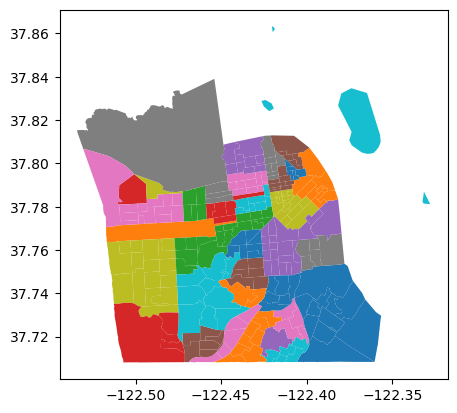

In [26]:
#simple plot map with colors
nhoods.plot(column='Neighborhood')

### COVID-19 DATA ###

In [27]:
# import the data and create it as a new variable
COVIDdf = pd.read_csv('data/COVID-19 Data SF.csv')

In [28]:
COVIDdf.info

<bound method DataFrame.info of         area_type          id  acs_population  count  count_last_60_days  \
0    Census Tract  6075010101            2045    360                  13   
1    Census Tract  6075010102            1920    374                  15   
2    Census Tract  6075010201            2331    384                  10   
3    Census Tract  6075010202            1984    352                   6   
4    Census Tract  6075010300            4282    657                  16   
..            ...         ...             ...    ...                 ...   
236  Census Tract  6075980200             185   1009                 104   
237  Census Tract  6075980300              32     10                   0   
238  Census Tract  6075980501             153     17                   2   
239  Census Tract  6075980600             747    362                  18   
240  Census Tract  6075980900             242    245                   7   

             rate  deaths                              

Great news, there are 241 rows AKA 241 census tracts. This matches the neighborhood data!

In [29]:
# check for leading zeros
COVIDdf['id'].sample(5)

58     6075015300
215    6075047904
31     6075012302
4      6075010300
37     6075012503
Name: id, dtype: int64

In [31]:
# adding leading zeros because I can see this column does not have them
COVIDdf = pd.read_csv(
    'data/COVID-19 Data SF.csv',
    dtype=
    {
        'id':str,
    }
)

In [32]:
# making sure leading zeros made it in
COVIDdf['id'].sample(5)

143    06075025702
225    06075061200
227    06075061402
205    06075045100
216    06075060100
Name: id, dtype: object

In [33]:
COVIDdf.head(5)

,area_type,id,acs_population,count,count_last_60_days,rate,deaths,multipolygon
0,Census Tract,06075010101,2045,360,13,1760.391198,3,MULTIPOLYGON (((-122.4210759996576 37.81288900...
1,Census Tract,06075010102,1920,374,15,1947.916667,0,MULTIPOLYGON (((-122.41688799988128 37.8052120...
2,Census Tract,06075010201,2331,384,10,1647.361647,3,MULTIPOLYGON (((-122.42483500033495 37.8022680...
3,Census Tract,06075010202,1984,352,6,1774.193548,2,MULTIPOLYGON (((-122.42684799963547 37.8090189...
4,Census Tract,06075010300,4282,657,16,1534.329752,2,MULTIPOLYGON (((-122.41871799973586 37.8059320...


Now that the COVID-19 data is uploaded, I will try to merge the COVID-19 data with the neighborhood data. 

In [34]:
#renaming the COVID-19 data file column from id to FIPS
COVIDdf = COVIDdf.rename(columns={'id': 'FIPS'})

In [35]:
COVIDdf.head(5)

,area_type,FIPS,acs_population,count,count_last_60_days,rate,deaths,multipolygon
0,Census Tract,06075010101,2045,360,13,1760.391198,3,MULTIPOLYGON (((-122.4210759996576 37.81288900...
1,Census Tract,06075010102,1920,374,15,1947.916667,0,MULTIPOLYGON (((-122.41688799988128 37.8052120...
2,Census Tract,06075010201,2331,384,10,1647.361647,3,MULTIPOLYGON (((-122.42483500033495 37.8022680...
3,Census Tract,06075010202,1984,352,6,1774.193548,2,MULTIPOLYGON (((-122.42684799963547 37.8090189...
4,Census Tract,06075010300,4282,657,16,1534.329752,2,MULTIPOLYGON (((-122.41871799973586 37.8059320...


In [42]:
# create a new dataframe based on the join
tracts_COVID=nhoods2.merge(COVIDdf,on="FIPS")

In [54]:
# what does it look like now?
tracts_COVID.head()

,geometry,FIPS,Neighborhood,area_type,acs_population,count,count_last_60_days,rate,deaths,multipolygon
0,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271...",06075980501,McLaren Park,Census Tract,153,17,2,1111.111111,1,MULTIPOLYGON (((-122.42722299984155 37.7155489...
1,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516...",06075017102,Haight Ashbury,Census Tract,3893,625,27,1605.445672,0,MULTIPOLYGON (((-122.45320600015674 37.7682489...
2,"MULTIPOLYGON (((-122.41500 37.78745, -122.4133...",06075012302,Tenderloin,Census Tract,2656,620,13,2334.337349,6,MULTIPOLYGON (((-122.41499499981933 37.7874539...
3,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308...",06075016801,Hayes Valley,Census Tract,4087,900,28,2202.104233,3,MULTIPOLYGON (((-122.43235099979876 37.7737789...
4,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117...",06075011902,Nob Hill,Census Tract,2957,463,14,1565.776124,3,MULTIPOLYGON (((-122.41246099987524 37.7916269...


Now I will make a bar chart that shows the 5 census tracts in SF with the highest rate of COVID-19 cases and highest number of COVID-19 deaths.

In [44]:
COVIDdf=COVIDdf.sort_values(by='rate',ascending = False)

<AxesSubplot: title={'center': 'Top 5 Census Tracts in SF with Highest Rate of COVID-19 Cases'}, ylabel='FIPS'>

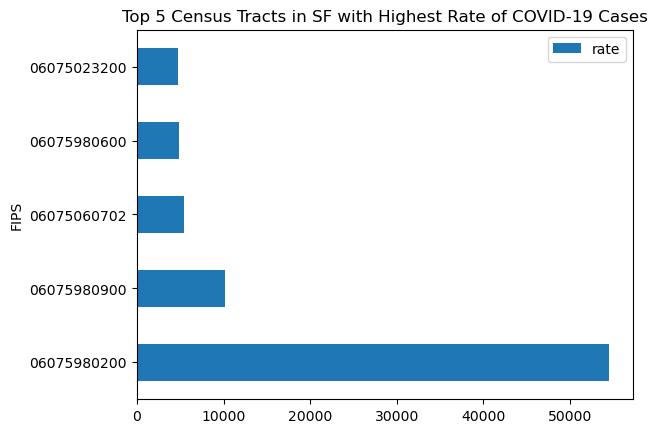

In [45]:
# creating a bar chart
COVIDdf.head(5).plot.barh(x='FIPS',
    y='rate', 
    title='Top 5 Census Tracts in SF with Highest Rate of COVID-19 Cases')

In [46]:
COVIDdf=COVIDdf.sort_values(by='deaths',ascending = False)

<AxesSubplot: title={'center': 'Top 5 Census Tracts in SF with Highest Number of COVID-19 Deaths'}, ylabel='FIPS'>

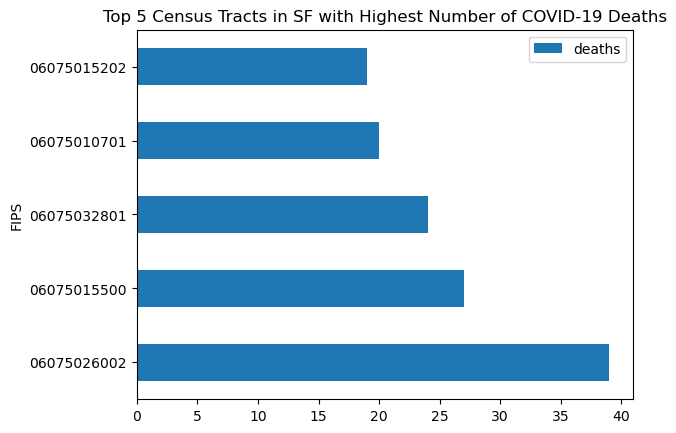

In [47]:
# creating a bar chart
COVIDdf.head(5).plot.barh(x='FIPS',
    y='deaths', 
    title='Top 5 Census Tracts in SF with Highest Number of COVID-19 Deaths')

### MAPPING ###

In [49]:
import folium

In [52]:
# mapping COVID case count by census
m = folium.Map(location=[37.7,-122.4],
zoom_start = 12,
tiles='CartoDB positron',
attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
    geo_data=tracts_COVID, # geo data
    data=tracts_COVID, # data
    key_on='feature.properties.FIPS', # key, or merge column
    columns=['FIPS', 'rate'], # [key, value]
    fill_color='BuPu',
    line_weight=0.2,
    fill_opacity=0.8,
    line_opacity=0.4, # line opacity (of the border)
    legend_name='COVID Rate by Census Tract, SF').add_to(m)

# name on the legend color bar
m

In [68]:
tracts_COVID.explore(
    column="deaths",
    tooltip="Neighborhood",
    popup=True,
    tiles="cartodbpositron",
    cmap="Reds",
    style_kwds=dict(color="white")
    )

In [ ]:
# mapping COVID rate by neighborhood
m = folium.Map(location=[37.7,-122.4],
zoom_start = 12,
tiles='CartoDB positron',
attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
    geo_data=tracts_COVID, # geo data
    data=tracts_COVID, # data
    key_on='feature.properties.FIPS', # key, or merge column
    columns=['FIPS', 'count'], # [key, value]
    fill_color='BuPu',
    line_weight=0.1,
    fill_opacity=0.8,
    line_opacity=0.2, # line opacity (of the border)
    legend_name='COVID Count by Census Tract, SF').add_to(m)

# name on the legend color bar
m

### HEALTH INSURANCE DATA ###

In [69]:
# importing health insurance coverage data
HIdf = pd.read_csv('data/Health Insurance.csv')

In [70]:
HIdf.shape

(244, 109)